In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CHOLESTEROL

In [190]:
df_weight = pd.read_csv("./data/Data_processed/df_w_2023.csv")
df_cholesterol_total = pd.read_csv("./data/Data_processed/df_cholesterol_imc_clean.csv")
df_cholesterol_total

,SEQN,Total_Cholesterol(mmol/L),HDL-Cholesterol(mmol/L),Cholesterol_index,Height(m),Weight(Kg),Weight(year_ago),Try_to_loss_weight,IMC,IMC_category,Year
0,130378.0,6.83,1.16,5.887931,1.8034,86.182480,90.718400,1.0,26.5,Overweight,2023
1,130379.0,5.53,1.55,3.567742,1.7780,99.790240,99.790240,2.0,31.6,Obesity,2023
2,130380.0,4.84,1.27,3.811024,1.5240,68.038800,74.842680,1.0,29.3,Overweight,2023
3,130386.0,4.73,1.19,3.974790,1.7272,90.718400,81.646560,2.0,30.4,Obesity,2023
4,130387.0,5.25,1.09,4.816514,1.7018,97.522280,97.522280,2.0,33.7,Obesity,2023
...,...,...,...,...,...,...,...,...,...,...,...
5941,142303.0,2.84,0.88,3.227273,1.6002,74.842680,72.574720,1.0,29.2,Overweight,2023
5942,142305.0,4.65,1.32,3.522727,1.5494,62.142104,60.781328,2.0,25.9,Overweight,2023
5943,142307.0,5.30,2.04,2.598039,1.5494,93.439952,106.594120,1.0,38.9,Obesity,2023
5944,142309.0,6.59,1.40,4.707143,1.7526,90.718400,77.110640,2.0,29.5,Overweight,2023


In [191]:
df_demographics = pd.read_csv("./data/Data_processed/df_demographic_clean.csv")
df_cholesterol_total_pob = pd.merge(df_cholesterol_total, df_demographics, on="SEQN", how="inner")
df_cholesterol_total_pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5946 entries, 0 to 5945
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       5946 non-null   float64
 1   Total_Cholesterol(mmol/L)  5946 non-null   float64
 2   HDL-Cholesterol(mmol/L)    5946 non-null   float64
 3   Cholesterol_index          5946 non-null   float64
 4   Height(m)                  5946 non-null   float64
 5   Weight(Kg)                 5946 non-null   float64
 6   Weight(year_ago)           5946 non-null   float64
 7   Try_to_loss_weight         5946 non-null   float64
 8   IMC                        5946 non-null   float64
 9   IMC_category               5946 non-null   object 
 10  Year                       5946 non-null   int64  
 11  Gender                     5946 non-null   object 
 12  Age(year)                  5946 non-null   float64
 13  Race                       5946 non-null   objec

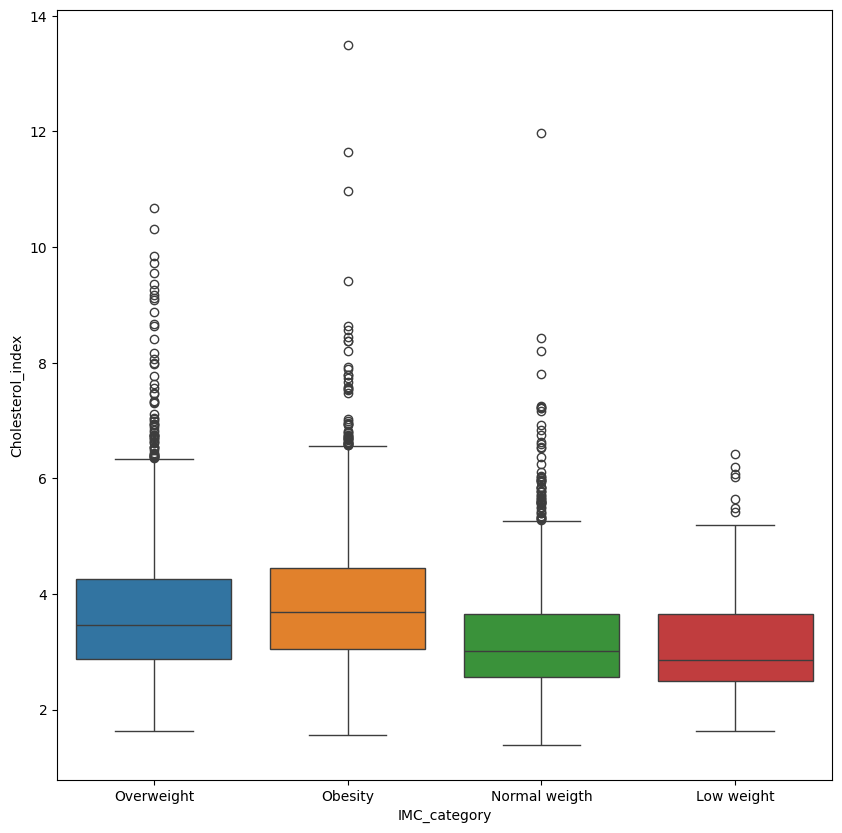

In [192]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "IMC_category",
            y = "Cholesterol_index",
            hue = "IMC_category",
            data=df_cholesterol_total_pob);

# OUTLIERS

In [193]:
Q1 = df_cholesterol_total_pob['Cholesterol_index'].quantile(0.25)
Q3 = df_cholesterol_total_pob['Cholesterol_index'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_cholesterol_total_pob = df_cholesterol_total_pob[(df_cholesterol_total_pob['Cholesterol_index'] >= lower_bound) & (df_cholesterol_total_pob['Cholesterol_index'] <= upper_bound)]

lower_percentile = df_cholesterol_total_pob['Cholesterol_index'].quantile(0.01)
upper_percentile = df_cholesterol_total_pob['Cholesterol_index'].quantile(0.99)

df_cholesterol_total_pob = df_cholesterol_total_pob[(df_cholesterol_total_pob['Cholesterol_index'] >= lower_percentile) & (df_cholesterol_total_pob['Cholesterol_index'] <= upper_percentile)]

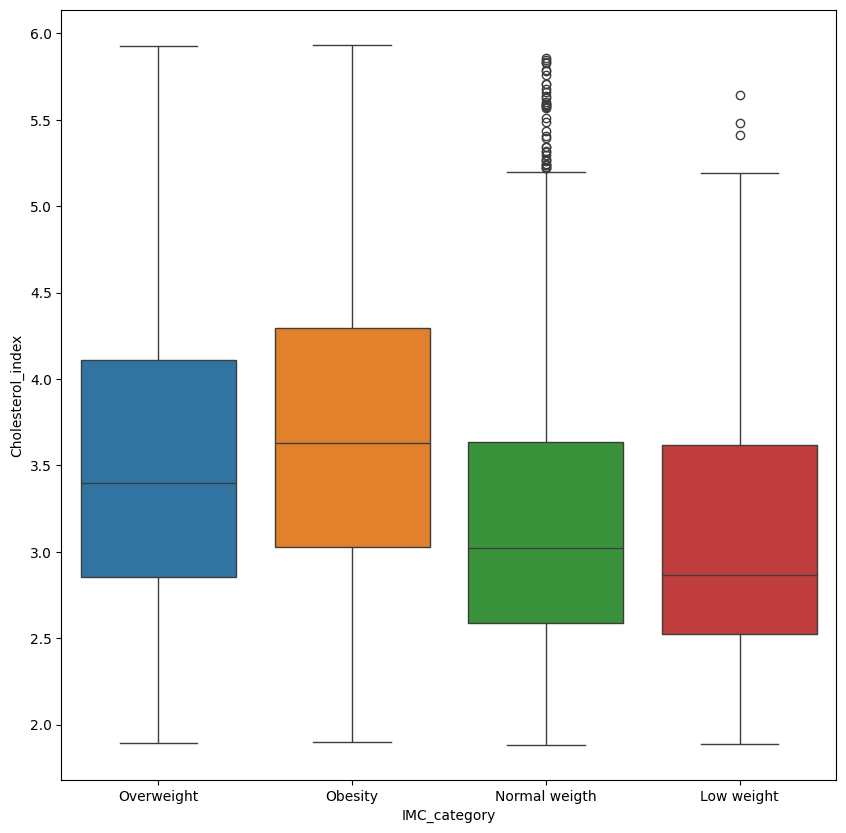

In [194]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "IMC_category",
            y = "Cholesterol_index",
            hue = "IMC_category",
            data=df_cholesterol_total_pob);

In [195]:
def clasificar_riesgo(row):
    # Calcular el índice colesterol total/HDL
    col_hdl_ratio = row["Cholesterol_index"]
    
    # Para hombres
    if row['Gender'] == 'Male':
        if row['Age(year)'] < 40:
            if col_hdl_ratio < 4.0:
                return 'Normal or low'
            elif 4.0 <= col_hdl_ratio <= 5.0:
                return 'Intermediate'
            else:
                return 'High'
        elif 40 <= row['Age(year)'] <= 59:
            if col_hdl_ratio < 4.5:
                return 'Normal or low'
            elif 4.5 <= col_hdl_ratio <= 5.5:
                return 'Intermediate'
            else:
                return 'High'
        else:  # 60 años o más
            if col_hdl_ratio < 4.5:
                return 'Normal or low'
            elif 4.5 <= col_hdl_ratio <= 5.5:
                return 'Intermediate'
            else:
                return 'High'

    # Para mujeres
    elif row['Gender'] == 'Female':
        if row['Age(year)'] < 40:
            if col_hdl_ratio < 3.5:
                return 'Normal or low'
            elif 3.5 <= col_hdl_ratio <= 4.5:
                return 'Intermediate'
            else:
                return 'High'
        elif 40 <= row['Age(year)'] <= 59:
            if col_hdl_ratio < 4.0:
                return 'Normal or low'
            elif 4.0 <= col_hdl_ratio <= 5.0:
                return 'Intermediate'
            else:
                return 'High'
        else:  # 60 años o más
            if col_hdl_ratio < 4.5:
                return 'Normal or low'
            elif 4.5 <= col_hdl_ratio <= 5.5:
                return 'Intermediate'
            else:
                return 'High'
    
    return 'Desconocido'  # Si el género es diferente de Male o Female

# Aplicar la función y crear la nueva columna 'Riesgo'
df_cholesterol_total_pob['Cardiovascular_risk_1'] = df_cholesterol_total_pob.apply(clasificar_riesgo, axis=1)

# Mostrar el resultado
print(df_cholesterol_total_pob[['Gender', 'Cholesterol_index', 'Cardiovascular_risk_1']].head())
df_cholesterol_total_pob.to_csv("./data/Data_processed/df_cholesterol_pob_clean.csv", index=False)

   Gender  Cholesterol_index Cardiovascular_risk_1
0    Male           5.887931                  High
1    Male           3.567742         Normal or low
2  Female           3.811024         Normal or low
3    Male           3.974790         Normal or low
4  Female           4.816514          Intermediate


# Diabetes


In [196]:
df_diabetes = pd.read_csv("./data/Data_processed/df_diabetes_clean.csv")

In [197]:
df_diabetes.columns

Index(['SEQN', 'Height(m)', 'Weight(Kg)', 'Weight(year_ago)',
       'Try_to_loss_weight', 'IMC', 'IMC_category', 'Year', 'Insulin(pmol/L)',
       'Fasting_Glucose(mmol/L))', 'Glycohemoglobin(%)'],
      dtype='object')

# OUTLIERS

In [198]:


def calculate_diabetes_Diabetes_index(df):
    """Calculate the diabetes risk index and classify risk based on percentiles (without normalization)."""
    
    # Calculate the risk index as the average of raw values
    df['Diabetes_index'] = (df['Insulin(pmol/L)'] + df['Fasting_Glucose(mmol/L))'] + df['Glycohemoglobin(%)']) / 3
    
    # Calculate percentiles
    low_percentile = np.percentile(df['Diabetes_index'], 30)  # 30th percentile
    high_percentile = np.percentile(df['Diabetes_index'], 70)  # 70th percentile
    
    # Classify the risk based on the index
    def classify_risk(index_value):
        if index_value < low_percentile:
            return 'Low risk'
        elif index_value > high_percentile:
            return 'High risk'
        else:
            return 'Moderate risk'
    
    # Apply the classification
    df['Diabetes_classification'] = df['Diabetes_index'].apply(classify_risk)
    
    return df[['SEQN','Height(m)','Weight(Kg)','Weight(year_ago)',
               'Try_to_loss_weight','IMC','IMC_category','Year',
               'Insulin(pmol/L)', 'Fasting_Glucose(mmol/L))', 'Glycohemoglobin(%)', 'Diabetes_index', 'Diabetes_classification']]

# Sample DataFrame for testing
data = {
    'Insulin(pmol/L)': [5.0, 15.0, 20.0, 7.5, 10.0],
    'Fasting_Glucose(mmol/L))': [90, 150, 180, 120, 110],
    'Glycohemoglobin(%)': [5.5, 6.5, 7.0, 5.8, 6.2]
}



# Calculate the risk index and classify risk
result_df = calculate_diabetes_Diabetes_index(df_diabetes)
df_diabetes_pob = pd.merge(result_df, df_demographics, on="SEQN", how="inner")

# Show the result


In [199]:
Q1 = df_diabetes_pob['Diabetes_index'].quantile(0.25)
Q3 = df_diabetes_pob['Diabetes_index'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
df_diabetes_pob = df_diabetes_pob[(df_diabetes_pob['Diabetes_index'] >= lower_bound) & (df_diabetes_pob['Diabetes_index'] <= upper_bound)]

lower_percentile = df_diabetes_pob['Diabetes_index'].quantile(0.01)
upper_percentile = df_diabetes_pob['Diabetes_index'].quantile(0.99)

df_diabetes_pob = df_diabetes_pob[(df_diabetes_pob['Diabetes_index'] >= lower_percentile) & (df_diabetes_pob['Diabetes_index'] <= upper_percentile)]

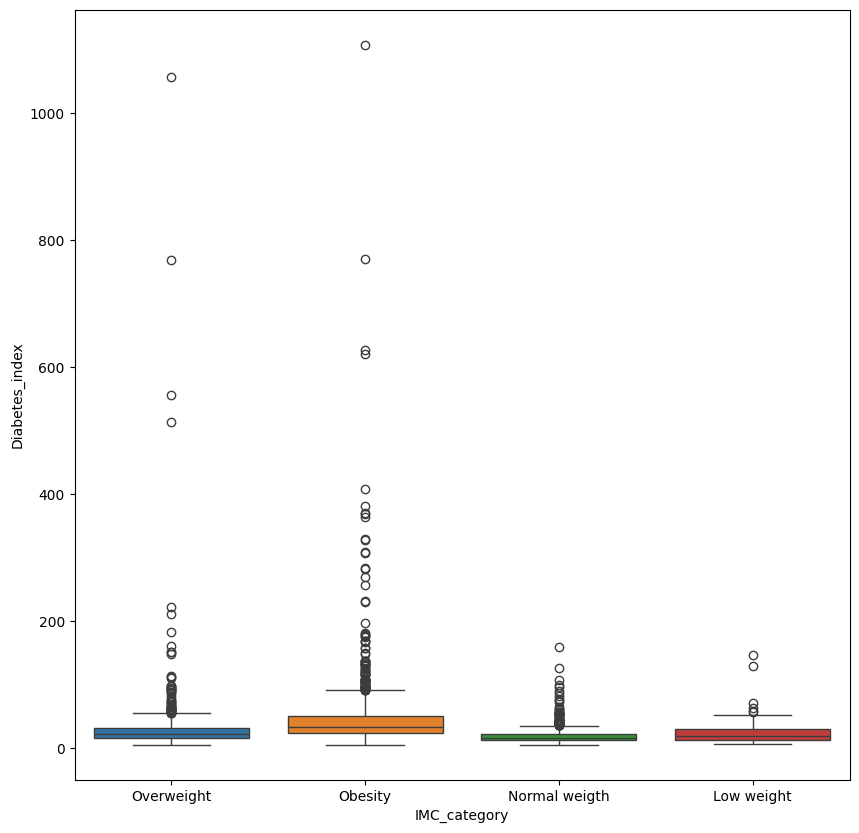

In [200]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "IMC_category",
            y = "Diabetes_index",
            hue = "IMC_category",
            data=df_diabetes);

In [201]:
df_diabetes_pob.to_csv("./data/Data_processed/df_diabetes_pob_clean.csv", index=False)


# INFLAMATORY

In [202]:
df_glycoprotein = pd.read_csv("./data/Data_processed/df_glycoprotein_clean.csv")
df_reactin = pd.read_csv("./data/Data_processed/df_reactin_protein_clean.csv")
df_inflamatory = pd.merge(df_glycoprotein, df_reactin, on="SEQN", how="inner")
df_temp = pd.merge(df_inflamatory, df_weight, on="SEQN", how="inner")
df_inflamatory_pob = pd.merge(df_temp, df_demographics, on="SEQN", how="inner")
df_inflamatory_pob.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            1441 non-null   float64
 1   alpha-1-acid_glycoprotein(g/L)  1441 non-null   float64
 2   C-Reactive Protein(mg/L)        1441 non-null   float64
 3   Height(m)                       1441 non-null   float64
 4   Weight(Kg)                      1441 non-null   float64
 5   Weight(year_ago)                1441 non-null   float64
 6   Try_to_loss_weight              1441 non-null   float64
 7   IMC                             1441 non-null   float64
 8   IMC_category                    1441 non-null   object 
 9   Gender                          1441 non-null   object 
 10  Age(year)                       1441 non-null   float64
 11  Race                            1441 non-null   object 
 12  Served_army                     13

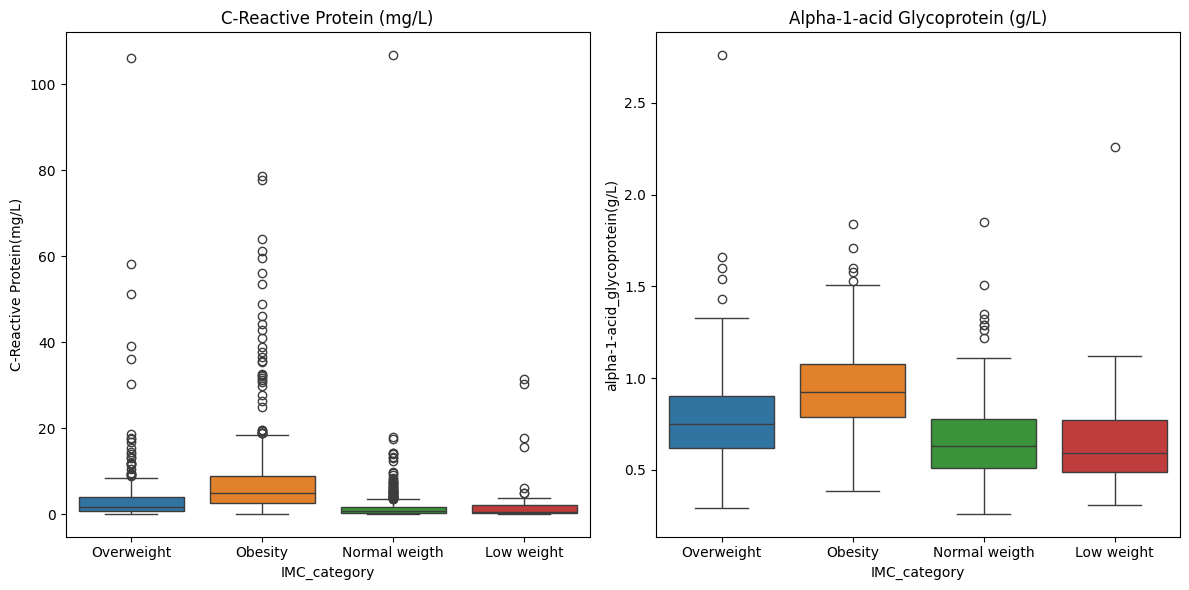

In [203]:
plt.figure(figsize=(12, 6))

# Crear la primera subgráfica (boxplot para 'C-Reactive Protein(mg/L)')
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, la primera subgráfica
sns.boxplot(x = "IMC_category",
            y = "C-Reactive Protein(mg/L)",
            hue = "IMC_category",
            data=df_inflamatory_pob)
plt.title("C-Reactive Protein (mg/L)")

# Crear la segunda subgráfica (boxplot para 'alpha-1-acid_glycoprotein(g/L)')
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, la segunda subgráfica
sns.boxplot(x = "IMC_category",
            y = "alpha-1-acid_glycoprotein(g/L)",
            hue = "IMC_category",
            data=df_inflamatory_pob)
plt.title("Alpha-1-acid Glycoprotein (g/L)")

# Mostrar la figura
plt.tight_layout()  # Ajusta el espacio entre subgráficas
plt.show()

In [204]:
# Q1 = df_inflamatory_pob['C-Reactive Protein(mg/L)'].quantile(0.25)
# Q3 = df_inflamatory_pob['C-Reactive Protein(mg/L)'].quantile(0.75)
# IQR = Q3 - Q1

# # Definir límites
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filtrar outliers
# df_inflamatory_pob = df_inflamatory_pob[(df_inflamatory_pob['C-Reactive Protein(mg/L)'] >= lower_bound) & (df_inflamatory_pob['C-Reactive Protein(mg/L)'] <= upper_bound)]

# lower_percentile = df_inflamatory_pob['C-Reactive Protein(mg/L)'].quantile(0.01)
# upper_percentile = df_inflamatory_pob['C-Reactive Protein(mg/L)'].quantile(0.99)

# df_inflamatory_pob = df_inflamatory_pob[(df_inflamatory_pob['C-Reactive Protein(mg/L)'] >= lower_percentile) & (df_inflamatory_pob['C-Reactive Protein(mg/L)'] <= upper_percentile)]

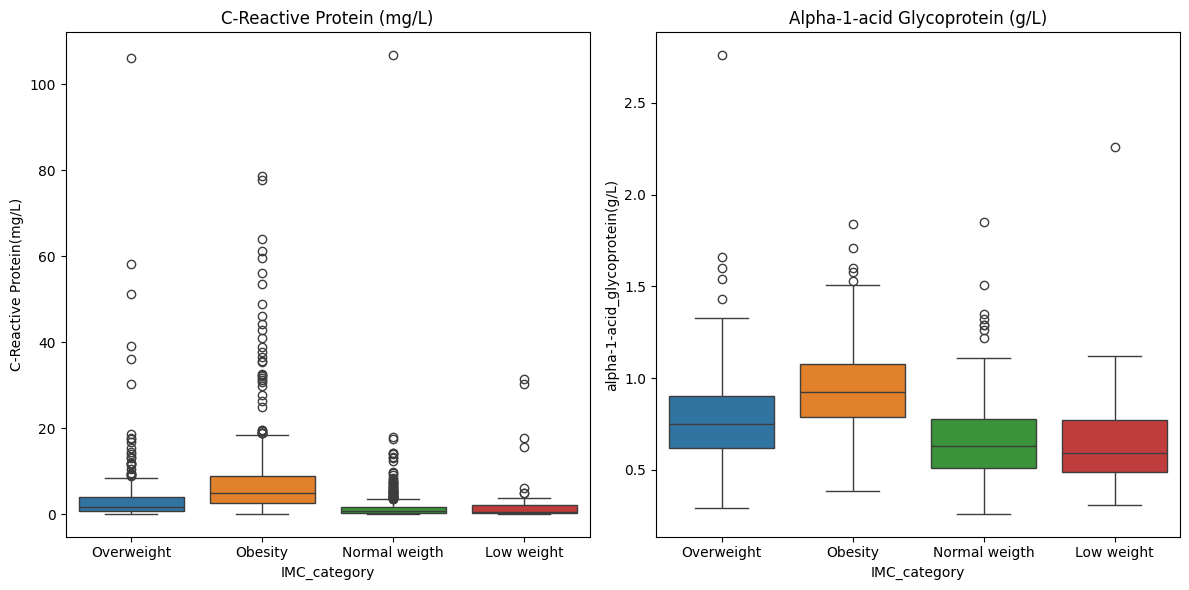

In [205]:
plt.figure(figsize=(12, 6))

# Crear la primera subgráfica (boxplot para 'C-Reactive Protein(mg/L)')
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, la primera subgráfica
sns.boxplot(x = "IMC_category",
            y = "C-Reactive Protein(mg/L)",
            hue = "IMC_category",
            data=df_inflamatory_pob)
plt.title("C-Reactive Protein (mg/L)")

# Crear la segunda subgráfica (boxplot para 'alpha-1-acid_glycoprotein(g/L)')
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, la segunda subgráfica
sns.boxplot(x = "IMC_category",
            y = "alpha-1-acid_glycoprotein(g/L)",
            hue = "IMC_category",
            data=df_inflamatory_pob)
plt.title("Alpha-1-acid Glycoprotein (g/L)")

# Mostrar la figura
plt.tight_layout()  # Ajusta el espacio entre subgráficas
plt.show()

C:\Users\rodri\AppData\Local\Temp\ipykernel_4196\2813111215.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_inflamatory_pob, x="Inflamatory_risk", palette="viridis")


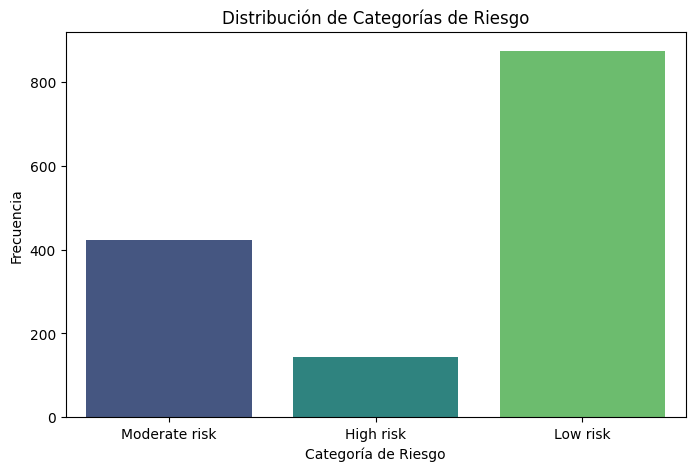

In [206]:
def clasificar_riesgo(row):
    hs_crp = row['C-Reactive Protein(mg/L)']
    agp = row['alpha-1-acid_glycoprotein(g/L)']

    # Clasificación de hs-CRP
    if hs_crp > 10 or agp > 2:
        return "High risk"
    elif hs_crp > 3 or agp > 1.2:
        return "Moderate risk"
    else:
        return "Low risk"

# Aplicar la función al DataFrame
df_inflamatory_pob['Inflamatory_risk'] = df_inflamatory_pob.apply(clasificar_riesgo, axis=1)
# 
# Visualizar distribución de riesgos
plt.figure(figsize=(8, 5))
sns.countplot(data=df_inflamatory_pob, x="Inflamatory_risk", palette="viridis")
plt.title("Distribución de Categorías de Riesgo")
plt.xlabel("Categoría de Riesgo")
plt.ylabel("Frecuencia")
plt.show()


# SMOKERS

In [207]:
df_smoking = pd.read_csv("./data/Data_processed/df_smoking_clean.csv")
df_temp = pd.merge(df_smoking, df_weight, on="SEQN", how="inner")
df_smoking_pob = pd.merge(df_temp, df_demographics, on="SEQN", how="inner")
df_smoking_pob.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6615 entries, 0 to 6614
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       6615 non-null   float64
 1   100_cigarettes_life        6335 non-null   object 
 2   now_smoke_cigarettes?      2518 non-null   object 
 3   cigarettes_past_30_days    919 non-null    object 
 4   tobacco_5_days             5750 non-null   object 
 5   cigarettes_smoked_per_day  786 non-null    object 
 6   last_cigarette             782 non-null    object 
 7   tobacco_product_5_days?    5735 non-null   object 
 8   Height(m)                  6615 non-null   float64
 9   Weight(Kg)                 6615 non-null   float64
 10  Weight(year_ago)           6615 non-null   float64
 11  Try_to_loss_weight         6615 non-null   float64
 12  IMC                        6615 non-null   float64
 13  IMC_category               6615 non-null   objec

In [209]:
print(df_cholesterol_total_pob.shape)
print(df_diabetes_pob.shape)
print(df_inflamatory_pob.shape)
print(df_smoking_pob.shape)

(5655, 24)
(2975, 25)
(1441, 22)
(6615, 26)


In [221]:
df_risk2 = pd.merge(df_cholesterol_total_pob, df_diabetes_pob, on="SEQN", how="inner")
df_risk2 = df_risk2.loc[:, ~df_risk2.columns.str.endswith('_x')]  

df_risk2.column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       2842 non-null   float64
 1   Total_Cholesterol(mmol/L)  2842 non-null   float64
 2   HDL-Cholesterol(mmol/L)    2842 non-null   float64
 3   Cholesterol_index          2842 non-null   float64
 4   Cardiovascular_risk_1      2842 non-null   object 
 5   Height(m)_y                2842 non-null   float64
 6   Weight(Kg)_y               2842 non-null   float64
 7   Weight(year_ago)_y         2842 non-null   float64
 8   Try_to_loss_weight_y       2842 non-null   float64
 9   IMC_y                      2842 non-null   float64
 10  IMC_category_y             2842 non-null   object 
 11  Year_y                     2842 non-null   int64  
 12  Insulin(pmol/L)            2842 non-null   float64
 13  Fasting_Glucose(mmol/L))   2842 non-null   float

In [222]:
df_risk3 = pd.merge(df_risk2, df_smoking_pob, on="SEQN", how="inner")
df_risk3 = df_risk3.loc[:, ~df_risk3.columns.str.endswith('_x')]  # Mantener solo las columnas que no terminan en "_x"

df_risk3.shape

(2842, 54)

In [223]:
df_risk4 = pd.merge(df_risk3, df_inflamatory_pob, on="SEQN", how="inner")
df_risk4 = df_risk4.loc[:, ~df_risk4.columns.str.endswith('_x')]  
df_risk4.shape

(685, 57)

In [220]:
df_risk4.columns


Index(['SEQN', 'Total_Cholesterol(mmol/L)', 'HDL-Cholesterol(mmol/L)',
       'Cholesterol_index', 'Height(m)_y', 'Weight(Kg)_y',
       'Weight(year_ago)_y', 'Try_to_loss_weight_y', 'IMC_y', 'IMC_category_y',
       'Year_y', 'Insulin(pmol/L)', 'Fasting_Glucose(mmol/L))',
       'Glycohemoglobin(%)', 'Diabetes_index', 'Diabetes_classification',
       '100_cigarettes_life', 'now_smoke_cigarettes?',
       'cigarettes_past_30_days', 'tobacco_5_days',
       'cigarettes_smoked_per_day', 'last_cigarette',
       'tobacco_product_5_days?', 'Gender_y', 'Age(year)_y', 'Race_y',
       'Served_army_y', 'Country_of_birth_y', 'Length_time_US_y',
       'Education(adults)_y', 'Marital_status_y', 'Pregnancy_status_y',
       'People_in_Household_y', 'Income_poverty_y', 'Races_simplify_y',
       'alpha-1-acid_glycoprotein(g/L)', 'C-Reactive Protein(mg/L)',
       'Height(m)_y', 'Weight(Kg)_y', 'Weight(year_ago)_y',
       'Try_to_loss_weight_y', 'IMC_y', 'IMC_category_y', 'Gender',
       'Age(y